# Loan Prediction Main

In [73]:
# Loading necessary packages
import pandas as pd
import numpy as np                       # For mathematical calculations
import seaborn as sns                    # For data visualization
import matplotlib.pyplot as plt          # For plotting graphs
%matplotlib inline
import warnings                          # To ignore any warnings
warnings.filterwarnings("ignore")        

## Data Analysis

In [74]:
# The Train file will be used for training our model. It contains all the independent
# variables and target variable.
# The Test file contains all the independent variables, but not the target variable. We
# will apply the model to predict the target variable for the test data.
# Sample submission file contains the format in which we have to submit our predictions.

# Reading the data
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [75]:
# Making copies of the Train and Test data so that I do not make any changes
# to the original datasets.
train_original = train.copy()
test_original = test.copy()

In [76]:
# Understanding the data : Here we will look at the structure of the train and test datasets.

# First we will check the features present and then look at their data types.
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [77]:
# Observation:
# We have 12 independent variables and 1 target variable, i.e Loan_Status in the train dataset

In [78]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Observation:
- We have similar features in the dataset as the train dataset except the Loan_Status.
- We will predict Loan_Status using the model built using the train data.

In [79]:
# Print the variable data types and shape
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [80]:
train.shape, test.shape

((614, 13), (367, 12))

In [81]:
# Observation:
# We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns 
# in the test dataset.

## Univariate / Bivariate Analysis

### Univariate Analysis


In [82]:
# Univariate Analysis

# This is the simplest form of analyzing data where we examine each variable individually.
# For categorical features, we can use frequency table or bar plots which will calculate 
# the number of each category in a particular variable.
# For numerical features, probability density plots can be used to look at the distribution 
# of the variable.

# Target Variable:
# Let's first look at the target variable 'Loan_Status'. As it is also a categorical variable,
# we will look at its frequency table, percentage distribution and bar plot.

train['Loan_Status'].value_counts() 

Y    422
N    192
Name: Loan_Status, dtype: int64

In [83]:
# Normalize can set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize = True) 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

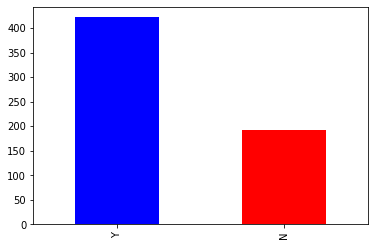

In [84]:
train['Loan_Status'].value_counts().plot.bar( color = ['blue', 'red']) 

In [85]:
# Observation: 
# The loan applications of 422 people (around 69%) out of 614 were approved.

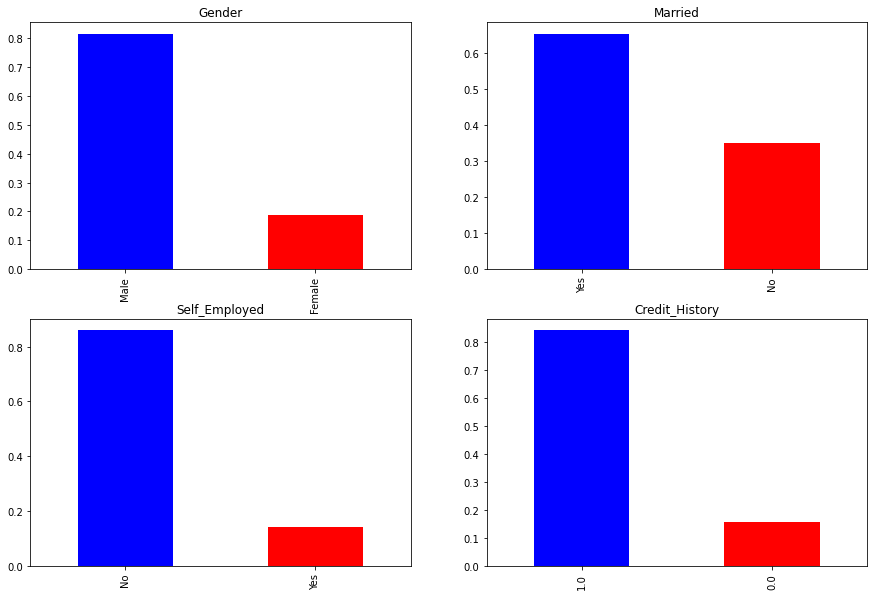

In [86]:
# Now let's visualize each variable separately.
# Categorical features: Gender, Marriage status, Employment status, Credit History, Loan Status
# Ordinal features: Dependents, Education, Property Area
# Numerical features: Applicant Income, Co-appliant Income, Loan Amount, Loan Term

plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (15,10), 
                                                        color = ['blue', 'red'],title = 'Gender')
plt.subplot(222) 
train['Married'].value_counts(normalize = True).plot.bar(
    color = ['blue', 'red'], title = 'Married')
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize = True).plot.bar(
    color = ['blue', 'red'], title = 'Self_Employed')
plt.subplot(224) 
train['Credit_History'].value_counts(normalize = True).plot.bar(
    color = ['blue', 'red'], title = 'Credit_History')
plt.show()

In [87]:
# Observations: 

# It can be inferred from the above bar plots that: 
# 1. 80% of the applicants in the dataset are male
# 2. Around 65% of the applicants are married
# 3. Around 15% of the applicants are self-employed
# 4. Around 85% of the applicants have repaid their debts

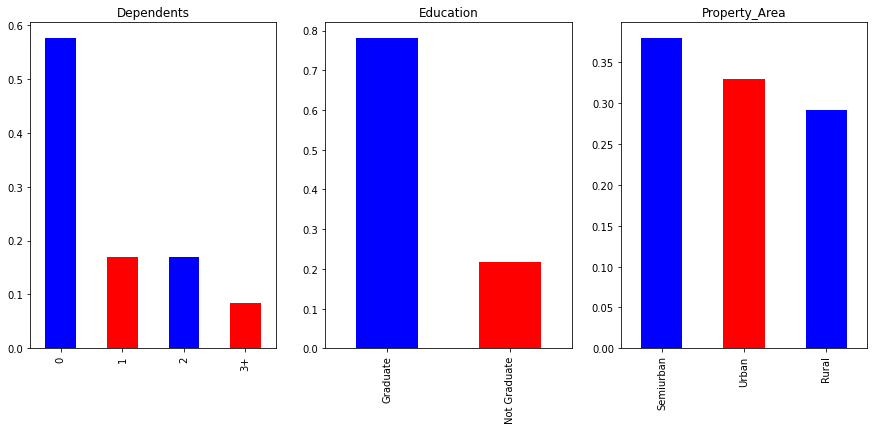

In [88]:
# Independent Variable (Ordinal)

plt.figure(1)
plt.subplot(131) 
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (15,6), 
                                                        color = ['blue', 'red'],title = 'Dependents')
plt.subplot(132) 
train['Education'].value_counts(normalize = True).plot.bar(
    color = ['blue', 'red'], title = 'Education')
plt.subplot(133) 
train['Property_Area'].value_counts(normalize = True).plot.bar(
    color = ['blue', 'red'], title = 'Property_Area')
plt.show()

Observations: 

It can be inferred from the above bar plots that: 
1. Most of the applicants in the dataset don't have any dependents
2. Around 80% of the applicants are Graduates
3. Most of the applicants are from Semi-Urban Areas


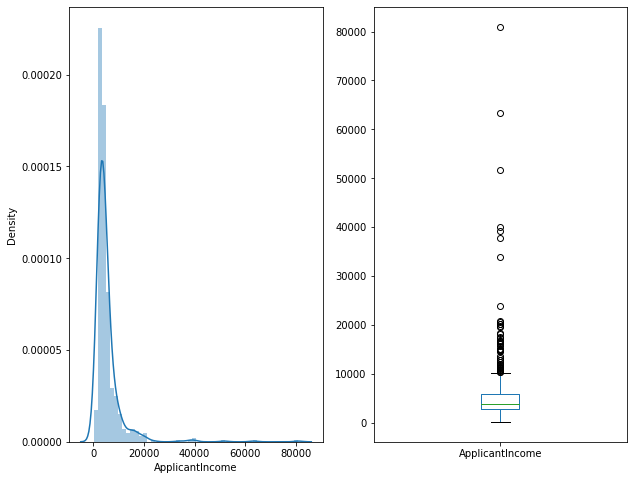

In [89]:
# Independent Variable (Numerical)
# Here we are looking at the distribution of applicant income

plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize = (10,8))
plt.show()

Observations: 

It can be inferred from the above bar plots that: 
1. Most of the applicants iis towards the left, which means it is not normally distributed.
2. The boxplot confirms the presence of alot of outliers / extreme values. 
 - This can be attributed to income disparity in the society.
3. We are also looking at people with different education levels. 

Let us segregate them by education

Text(0.5, 0.98, '')

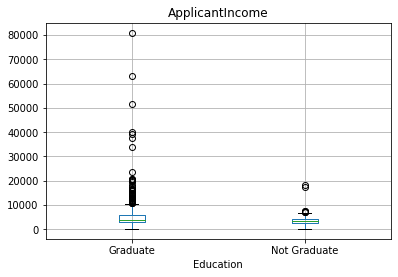

In [90]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("") 


Observations: 

- We can see alot of outliers in this variable and the distribution is fairly normal.
- We will deal with outliers later.

### Bivariate Analysis


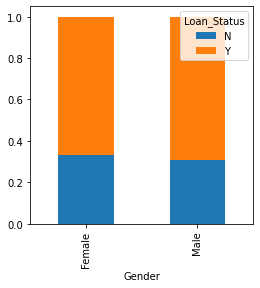

In [91]:
# Bivariate Analysis

# Lets recall some of the hypotheses that we generated earlier:

# **Salary: 
#   Applicants with high income should have more chances of loan approval
# **Previous history: 
#   Applicants who have repaid their previous debts should have higher 
#   chances or loan approval.
# **Loan amount: 
#   Loan approval should also depend on the loan amount. 
#   If the loan amount is less, chances of loan approval should be high.
# **Loan term: 
#   Loan for less time period and less amount should have higher chances of approval.
# **EMI: 
#   Lesser the amount to be paid monthly to repay the loan, the higher 
#   the chance of loan approval.


# Categorical Independent Variable vs Target Variable:

# First, we will find the relation between the proportion of approved and unapproved loans.

Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = "bar", 
                                                       stacked = True, figsize = (4,4))

Observation: 

- It can be inferred from the above bar plots that the proporion of male and female applicants is more or less the same for both approved and unapproved loans.

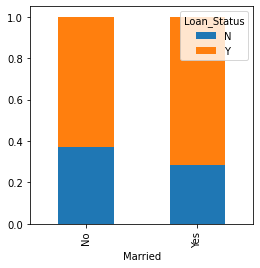

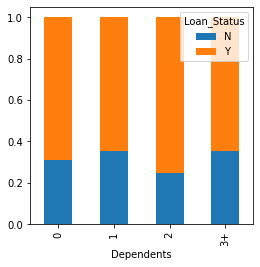

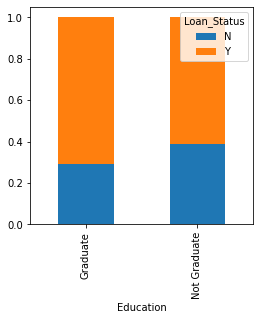

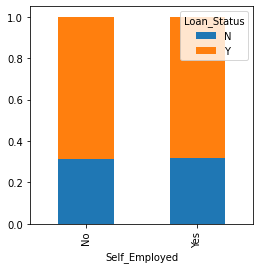

In [92]:
# Now lets visualize the remaining categorical variables vs target variables.

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar", 
                                                       stacked = True, figsize = (4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", 
                                                       stacked = True, figsize = (4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar", 
                                                       stacked = True, figsize = (4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = "bar", 
                                                       stacked = True, figsize = (4,4))
plt.show()

Observations: 

It can be inferred from the above bar plots that: 
1. Proportion of married applicants is higher for the approved loans.
2. Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
3. There is nothong significant we can infer from Self_Employed vs Loan_Status plot.

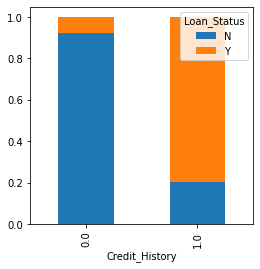

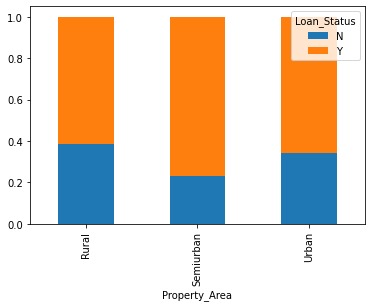

In [93]:
# Now lets look at the relationship between the remaining categorical independent 
# variables and Loan_Status

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float),axis = 0).plot(
    kind = "bar", stacked = True, figsize = (4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).plot(
    kind = "bar", stacked = True)
plt.show()

Observations:

1. It seems people with credit history as 1 are more likely to get their loans approved.
2 .Proportion of loans getting approved in Semi-Urban areas are higher as compared to that in rural or urban areas.

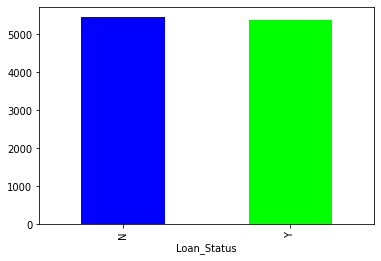

In [94]:
# Now lets visualize numerical independent variables with respect to the target variable.

# We will try to find the mean income of people for which the loan ahas been approved vs
# the mean income of people for which the loanhas not been approved

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color = ['blue', 'lime']) 

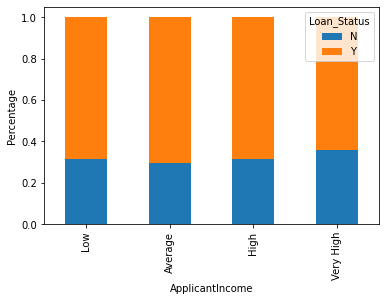

In [95]:
# Here the y-axis represents the mean applicant income.
# We don't see any change in the mean income. So lets make bins for the applicant income 
# variable based on the values in it and analyze the corresponding loan status for each bin.

bins = [0,2500,4000,6000,8100]
group = ['Low', 'Average', 'High', 'Very High']

train ['Income_bin'] = pd.cut (train['ApplicantIncome'], bins, labels = group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(
    kind = "bar",stacked = True)
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage') 

Observations:

It seems that Applicant income does not affect the chances of loan approval which contradicts our hypotheses in which we assumed that if the applicant's income is high, the chances of loan approval will also be high.

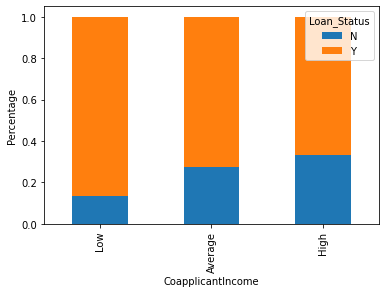

In [96]:
# Let's analyze the co-applicant income and loan amount variables in a similar manner.

bins = [0,1000,3000,42000]
group = ['Low', 'Average', 'High']

train ['Coapplicant_Income_bin'] = pd.cut (train['CoapplicantIncome'], bins, labels = group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis = 0).plot(
    kind = "bar",stacked = True)
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage') 

Observations:

This shows that if the coapplicant's income is less, the chances of loan approval are high.
But this does not look right. The possible reason behind this may be that most of the 
applicants don't have any coapplicant, so the coapplicant income for such applicants is 0
hence the loan approval is not dependent on it.

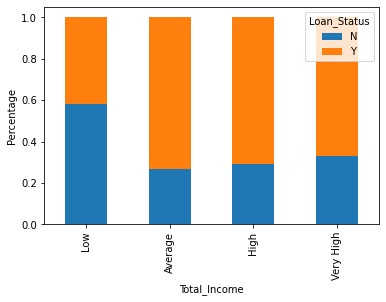

In [97]:
# We can make a new variable which we will combine the applicant's and coapplicant's income 
# to visualize the combined effect of income on loan approval.

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']

train ['Total_Income_bin'] = pd.cut (train['Total_Income'], bins, labels = group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(
    kind = "bar",stacked = True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage') 

Observations:

We can see that proportion of loans getting approved for applicants having low total income is very less as compared to that of applicants with average high and very high income.

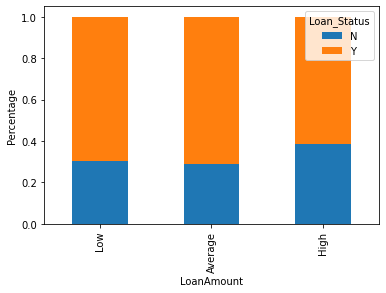

In [98]:
# Lets visualize the loan amount variable

bins = [0,100,200,700]
group = ['Low', 'Average', 'High']

train ['LoanAmount_bin'] = pd.cut (train['LoanAmount'], bins, labels = group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(
    kind = "bar",stacked = True)
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage') 

Observations:

We can see that proportion of loans getting approved is higher for low and average loan 
amount as compared to that of high loan amount which supports our hypotheses in which 
we considered that the chances of loan approval will be high when the loan amount is less.

In [99]:
# Lets drop the bins which we created for the exploration part.

# We will change the 3+ in the dependents variable to 3 to make it a numerical variable.
# We wil also convert the target variable's categories into 0 and 1 so that we can find its 
# correlation with numerical variables.
# One more reason to do this is because few models like logistic regression takes only numeric
# values as input.
# Hence we will replace N with 0 , and Y with 1.

train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin',
                    'Total_Income_bin','Total_Income'], axis = 1)

train['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'].replace('3+', 3, inplace = True)
train['Loan_Status'].replace('N', 0, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)

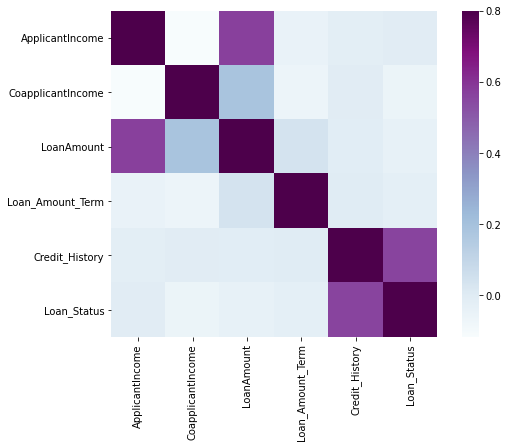

In [100]:
# Now lets look at the correlation between all the numerical variables.
# We wil use the heatmap to visualize the correlation.
# Heatmaps visualize data through variations in coloring. 
# The variables with darker color means thir correlation is more.

matrix = train.corr() 
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, square = True, cmap = "BuPu")

Observations:

We can see that the most correlated variables are :
1. Applicant Income - Loan Amount
2. Credit History - Loan Status
3. Loan Amount is also correlated with Coapplicant Income

## Outliers And Missing Values:


In [101]:
# After exploring all the variables in our data, we can now impute the 
# missing values and deal with the outliers because missing data and 
# outliers can have adverse effects on the model performance.

# MISSING VALUES
# Lets list out feature-wise count of missing values.

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observations:

We can see that there are missing values in Gender, Married, Dependents, Credit History,
Self Employed, Loan Amount and Loan Amount Term.

We will deal with these missing values one by one.
We can consider these methods to fill the missing values:
- For Numerical Variables: Imputation using mean or median
- For Categorical Variables: Imputation using mode

In [102]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True) 

In [103]:
# Now lets try to find a way to fill the missing values in Loan_Amount_Term.
# We will look at the value count of the loan amount term variable.

train['Loan_Amount_Term'].value_counts() 

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Observations:

We can see that in the loan amount term variable, the value '360' is the most repeated.
So lets replace the missing values in this variable using the mode of this variable.

In [104]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True) 

In [105]:
# Because Loan Amount is a numerical variable, we can use mean or median to 
# impute the missing values. We will use median to fill the null values.

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True) 

In [106]:
# Now lets see whether all the missing values are filled in the dataset

train.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Observations:

We can see that all missing values in the train dataset have been filled.

Now lets fill all the missing values in the test dataset as well.

In [107]:
test.isnull().sum() 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [108]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
test['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True) 

In [109]:
test.isnull().sum() 
# Observations:

# We can see that all missing values in the train dataset have been filled.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

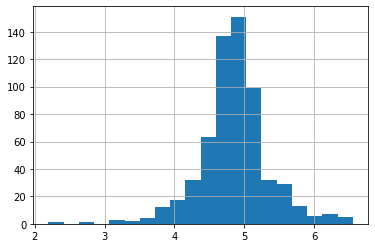

In [110]:
# OUTLIERS

# As we saw earlier in univariate analysis, Loan Amount contains outliers so we have to 
# deal with them as they affect the distribution of the data.
# Due to these outliers, the bulk of data in the loan amount is at the left and the right 
# tail is longer. This is called right skewness.

# One way to remove the skewness is by doing the log transformation.
# As we take the log transformation, it does not affect the smaller values much, 
# but reduces the larger values. So, we get a distribution similar to normal distribution.

# Lets visualize the effect of log transformation.
# We will do similar changes to the test file simultaneously.

train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)
test['LoanAmount_log'] = np.log(test['LoanAmount']) 

Observations:

We can see that now the distribution looks much closer to normal and effect of extreme 
values has been significantly subsided.

# Model Building 

## Model Building : Part I



In [111]:
# Let's drop the Loan_ID variable as id doesn't affect on the loan status.
# We will do the same changes to the test dataset which we did for the training dataset.

train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [112]:
# Let's drop our target variable from the train dataset and save it in another dataset.

X = train.drop ('Loan_Status', 1)
y = train.Loan_Status

In [113]:
# We will now make dummy variables for the categorical variables.
# Dummy variables turn categorical variables into a series of 0 and 1, making them
# a lot easier to quantify and compare.

X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [114]:
# We need to split our training dataset into train and validation datasets.
# We can train the model on this train part and use that to make predictions for the 
# validation part. In this way, we can validate our predictions as we have the true predictions
# for the validation part (whuch we dont yet have fro the test dataset.)

# We will use the train_test_split function to divide our train dataset.

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split (X,y, test_size = 0.3)

In [115]:
# The dataset has been divided into training and validation sets.
# Importing Logistic Regression and accuracy score and fitting the Logistic Regression Model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit (x_train, y_train)

LogisticRegression (C = 1.0, class_weight = None, dual = False, fit_intercept = True,
                    intercept_scaling = 1, max_iter = 100, multi_class = 'ovr', n_jobs = 1,
                    penalty = '12', random_state = 1, solver = 'liblinear', tol = 0.0001,
                    verbose = 0, warm_start = False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stonger regularization.

In [116]:
# Let's predict the Loan_Status for validation set and calculate its accuracy.

pred_cv = model.predict(x_cv)

In [117]:
# Let's calculate how accurate our predictions are by calculating the accuracy.

accuracy_score(y_cv,pred_cv)

0.7567567567567568

Observation:

Our model has an accuracy score of 80%.

In [118]:
# Lets make predictions for the test dataset

pred_test = model.predict(test)

In [119]:
# Importing the submission file which we have to submit on the solution checker.

submission = pd.read_csv ("sample_submission_49d68Cx.csv")

In [120]:
# We only need the Loan ID and the corresponding Loan Status for trhe final submission.
# Filling these columns with the Loan ID of test dataset and the predictions that we made.

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original ['Loan_ID']

In [121]:
# Converting 1 and 0 to Y and N.
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [122]:
# Converting the submission to csv format and make submission and to check the accuracy

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

Instead of creating a validation set, we can also make use of cross validation to validate our predictions.

In [123]:
ss = pd.read_csv("logistic.csv")

In [124]:
ss.head()

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y


In [125]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


## Model Building: Part II

We will build the following models in this section:
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

In [126]:
# Let's prepare the data for feeding into the models

X = train.drop('Loan_Status', 1)
y = train.Loan_Status                # Save target variable in separate dataset

### Logistic Regression

In [152]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
  print ('\n{} of kfold {}'.format (i,kf.n_splits))
  xtr,xvl = X.loc[train_index], X.loc[test_index]
  ytr,yvl = y[train_index], y[test_index]

model = LogisticRegression(random_state=1)
model.fit(xtr, ytr)
pred_test = model.predict(xvl)
score = accuracy_score (yvl, pred_test)
print('accuracy_score', score)

i+=1
pred_test = model.predict(test)
pred = model.predict_proba (xvl)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7950819672131147


Observation:

The mean validation accuracy for this model is 0.795

In [140]:
submission['Loan_Status'] = pred_test       #Filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID'] # Filling Loan_ID with test Loan_ID

In [142]:
# Replacing 0 and 1 with N and Y

submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [143]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Log2.csv')

### Decision Tree

This is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems.

Here, we split the population or sample into two or more homogeneous sets ( or sub-populations) based on most significant splitter / differentiator in input variables.

Decision Tree uses multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [150]:
from sklearn import tree

In [153]:
# Lets fit the decision tree model with 5 folds of cross validation

i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
  print ('\n{} of kfold {}'.format (i,kf.n_splits))
xtr,xvl = X.loc[train_index], X.loc[test_index]
ytr,yvl = y[train_index], y[test_index]
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(xtr, ytr)
pred_test = model.predict(xvl)
score = accuracy_score (yvl, pred_test)
print('accuracy_score', score)
i+=1
pred_test = model.predict(test)


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.6721311475409836


Observation:

The mean validation accuracy for this model is 0.67

In [154]:
submission['Loan_Status'] = pred_test       #Filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID'] # Filling Loan_ID with test Loan_ID

# Replacing 0 and 1 with N and Y

submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('DecisionTree.csv')

Observation:

We got a higher accuracy score from the logistic regression model (0.795) than from the Decision Tree model(0.67).

Lets build another model to try improve our model accuracy

### Random Forest

- Random Forest is a tree based bootstrapping algorithm wherein a certain no. of weak learners(Decision Trees) are combined to make a powerful prediction model.
- For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
- Final prediction can be a function of all the predictions made by the individual learners.
- Incase of a regression problem, the final prediction can be the mean of all the predictions.

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
  print ('\n{} of kfold {}'.format (i,kf.n_splits))
xtr,xvl = X.loc[train_index], X.loc[test_index]
ytr,yvl = y[train_index], y[test_index]

model = RandomForestClassifier(random_state=1, max_depth = 10)
model.fit(xtr, ytr)
pred_test = model.predict(xvl)
score = accuracy_score (yvl, pred_test)
print('accuracy_score', score)
i+=1
pred_test = model.predict(test)


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7540983606557377


Observation:

The mean validation accuracy for this model is 0.75

Lets try to improve the accuracy by tuning the hyperparameters for this model.

We will use grid search to get the optimized values of hyper parameters. It is a way of selecting the best of a family of hyperparameters, parametrized by a grid of parameters.

Lets tune the max_depth and n_estimators parameters.

- **max_depth** decides the maximum depth of the tree
- **n_estimators** decides the number of trees that will be used in random forest model

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
# Provide range for max_depth from 1 to 20 with an interval of 2 from 1 to 200 with
# an interval of 20 fro n_estimators

paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [160]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [161]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Observation:

The optimized value for the max_depth variable is **7** and for n_estimators is **41**.

Now let's build the model using these optimized values.

In [162]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
  print ('\n{} of kfold {}'.format (i,kf.n_splits))
xtr,xvl = X.loc[train_index], X.loc[test_index]
ytr,yvl = y[train_index], y[test_index]

model = RandomForestClassifier(random_state=1, max_depth = 3, n_estimators=41)
model.fit(xtr, ytr)
pred_test = model.predict(xvl)
score = accuracy_score (yvl, pred_test)
print('accuracy_score', score)
i+=1
pred_test = model.predict(test)
pred2 = model.predict_proba(test)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7950819672131147


Observation:

The mean validation accuracy for this model is 0.795

In [163]:
submission['Loan_Status'] = pred_test       #Filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID'] # Filling Loan_ID with test Loan_ID

# Replacing 0 and 1 with N and Y

submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('RandomForest.csv')

### XGBOOST



This is a fast and efficient algorithm that works only with numeric variables and we have already replaced the categorical variables with numeric variables.

Let's have a look at the parameters that we are going to use in our model.

- **n_estimators**: this specifies the number of trees for the model
- **max_depth**: we can specify maximum depth of a tree using this parameter.

In [165]:
from xgboost import XGBClassifier

In [166]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X,y):
  print ('\n{} of kfold {}'.format (i,kf.n_splits))
xtr,xvl = X.loc[train_index], X.loc[test_index]
ytr,yvl = y[train_index], y[test_index]

model = XGBClassifier(n_estimators=50, max_depth = 4)
model.fit(xtr, ytr)
pred_test = model.predict(xvl)
score = accuracy_score (yvl, pred_test)
print('accuracy_score', score)
i+=1
pred_test = model.predict(test)
pred3 = model.predict_proba(test)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.8032786885245902


Observation:

The mean validation accuracy for this model is 0.803

In [167]:
submission['Loan_Status'] = pred_test       #Filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID'] # Filling Loan_ID with test Loan_ID

# Replacing 0 and 1 with N and Y

submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('XGBoost.csv')

# Final Observations

- XGBoost Model was the best with an accuracy score of 80.3 %
- Random Forest Model had an accuracy score of 79.5%
- Logistic regression model had an accuracy score of 79.5%
- Decision Tree model had an accuracy score of 67%

# Feature Importance Engineering

Let's use feature_importances_attribute to identify which features are most important for this problem.

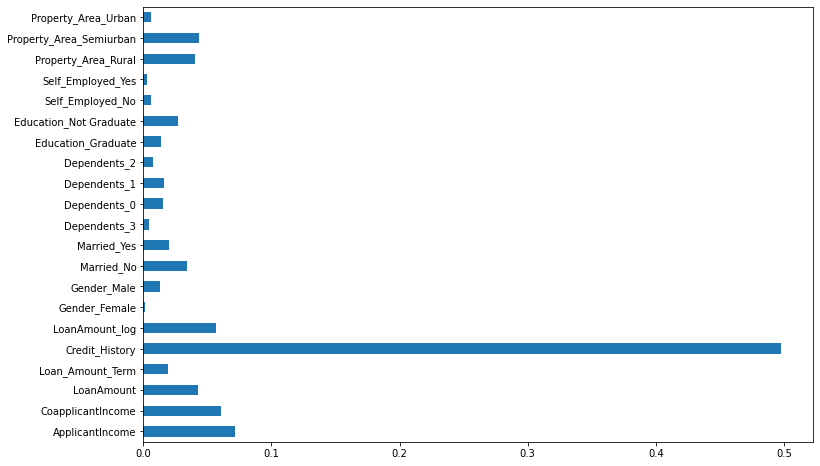

In [164]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit History is the most important feature.

Feature engineering helps us identify our target variable.

**What more can be tried?**

- We can train the XGBoost model using grid search to optimize its hyperparameters and improve the accuracy.
- We can combine the applicants with 1,2,3 or more dependents and make a new feature as discussed in the EDA part.
- We can also make independent variable visualizations to discover some more patterns.
- We can also arrive at the EMI using a better formula which may include interest rates as well.
- We can even try ensemble modelling(combination of different models). 